In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

### Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]
light = ["f6e8c3", "#c7eae5", "#e7d4e8"]

## Predictions

In [4]:
rxtr = pd.read_csv('../results/28march2018/sfcompo_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('../results/28march2018/sfcompo_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('../results/28march2018/sfcompo_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('../results/28march2018/sfcompo_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

rxtr.columns

Index(['Instance', 'Ridge', 'SVR', 'TrueY', 'kNN'], dtype='object')

## Scores (Aggregate data)

In [5]:
r_scr = pd.read_csv('../results/3april2018/sfcompo_fissactreactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# MWd/MTU
b_scr = pd.read_csv('../results/3april2018/sfcompo_fissactburnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# %u235
e_scr = pd.read_csv('../results/3april2018/sfcompo_fissactenrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
# days
c_scr = pd.read_csv('../results/3april2018/sfcompo_fissactcooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
c_scr.columns

Index(['CV_fold', 'fit_time', 'score_time', 'test_explained_variance',
       'test_neg_mean_absolute_error', 'test_neg_mean_squared_error',
       'test_r2', 'test_neg_rmse', 'algorithm'],
      dtype='object')

## Training Set

In [6]:
trainXY = pd.read_pickle("../sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
# nucs messed up somehow and labels are at beginning
x = len(trainXY.columns)
dfY_b = trainXY.iloc[:, 0]//1000
dfY_c = trainXY.iloc[:, 1]//30
dfY_e = trainXY.iloc[:, 2]
dfY_r = trainXY.iloc[:, 3]
dfX = trainXY.iloc[:, 4:x]
# rename cols
burn_name = 'Burnup [GWd/MTU]'
cool_name = 'Cooling Time [Months]'
enr_name = 'Enrichment [% U235]'
rxtr_name = 'Reactor Type'
trainXY[burn_name] = trainXY['Burnup']//1000
trainXY[cool_name] = trainXY['CoolingTime']//30
trainXY[enr_name] = trainXY['Enrichment']
trainXY[rxtr_name] = trainXY['ReactorType']
trainXY.columns

Index(['Burnup', 'CoolingTime', 'Enrichment', 'ReactorType', 'ba138', 'ce140',
       'ce142', 'ce144', 'cs133', 'cs135', 'cs137', 'la139', 'mo100', 'mo95',
       'mo97', 'mo98', 'nd143', 'nd144', 'nd145', 'nd146', 'pd104', 'pd105',
       'pd106', 'pr141', 'pu239', 'pu240', 'pu241', 'pu242', 'rb87', 'rh103',
       'ru101', 'ru102', 'ru104', 'sr88', 'sr90', 'tc99', 'total', 'u234',
       'u235', 'u236', 'u238', 'xe131', 'xe132', 'xe134', 'xe136', 'y89',
       'zr91', 'zr92', 'zr93', 'zr94', 'zr96', 'Burnup [GWd/MTU]',
       'Cooling Time [Months]', 'Enrichment [% U235]', 'Reactor Type'],
      dtype='object')

## Compare Predictions
### Natural uranium not reliably predicted by any algorithm
### Certain locations in training set space difficult to predict OR error higher in certain locations in training set space

In [8]:
params = ['Burnup', 'Enrichment', 'Cooling Time']
values = ['TrueY', 'kNN', 'Ridge', 'SVR']
#tups = params * values
#for p in params:
#    p_tup = zip(p*len(burn), values)
#    tups.insert(len(tups), p_tup)

#tups = zip(*[['Estimates']*len(data),data.keys()])

#pred_df = pd.DataFrame()
#pred_df = pd.concat([burn, enri, cool], axis=1)
#df.columns = pd.MultiIndex.from_tuples([burn_tuples, enri_tuples, cool_tuples], 
#                                       names=['Parameter', 'Value'])



#tups
#label params
#burn['Parameter'] = 'Burnup'
#enri['Parameter'] = 'Enrichment'
#cool['Parameter'] = 'Cooling Time'
#rxtr['Parameter'] = 'Reactor Type'
#pred_df = pd.DataFrame()
#pred_df = pd.concat([burn, enri, cool])#, rxtr])
#pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
#                       value_vars = ['SVR', 'kNN', 'Ridge'], 
#                       value_name='Predicted Value', var_name='Algorithm')
#pred_df.sample(10)

In [9]:
#yvars = [pred_df[pred_df.Parameter=='Burnup'], 
#         pred_df[pred_df.Parameter=='Enrichment'], 
#         pred_df[pred_df.Parameter=='Cooling Time']]

#plt.clf()
#sns.set(style="ticks", font_scale=1.0)
#p = sns.pairplot(pred_df, hue='Algorithm', 
                 x_vars=['TrueY', 'Ridge', 'SVR'], 
                 y_vars=['TrueY', '', ''])
#p = p.map(plt.scatter, 'TrueY', 'Predicted Value').set_axis_labels('Ground Truth', 'Predicted Value')

IndentationError: unexpected indent (<ipython-input-9-f5b091c1f7a0>, line 8)

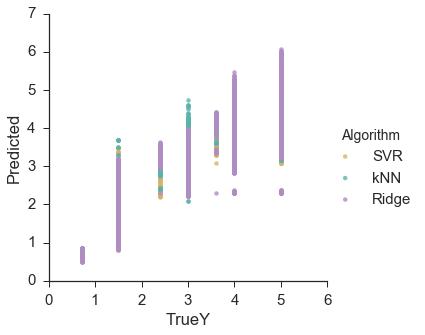

In [70]:
plt.clf()
sns.set(style="ticks", font_scale=1.5)
g = sns.lmplot(x="TrueY", y="Predicted", hue="Algorithm", data=burn_df, 
               fit_reg=False, palette=sns.color_palette(med))
#burn_g.axes[0,0].set_ylim(-3, 70)
#burn_g.axes[0,0].set_xlim(-2, 70)

In [ ]:

burns = burn[['Ridge', 'SVR', 'TrueY', 'kNN']] // 1000.0
enris = enri[['Ridge', 'SVR', 'TrueY', 'kNN']]
bY = burns[['TrueY']]
eY = enris[['TrueY']]

#bin stuff
x = bY
y = eY
xbin = 1.5
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

#figure stuff
fig, axScatter = plt.subplots(figsize=(7, 7))
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
#axScatter.scatter(burns[['kNN']], enris[['kNN']], s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burns[['Ridge']], enris[['Ridge']], s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
axScatter.scatter(burns[['SVR']], enris[['SVR']], s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
#fig.savefig('test.png', bbox_inches='tight')
plt.show()

In [ ]:
pred = sns.FacetGrid(data=pred_df, col="Parameter",
                     hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
pred.axes[0,0].set_ylim(-5, 70)
pred.axes[0,0].set_xlim(-5, 70)
plt.plot([-5, -5], [65, 65], 'k-', linewidth=2)

#pred.savefig('predictions.png', bbox_inches='tight', transparent=True)

fig, axScatter = plt.subplots(figsize=(7, 7))
#axScatter.scatter(x, y, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
axScatter.scatter(burn_knn, enr_knn, s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
#axScatter.scatter(burn_svr, enr_svr, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
#axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
fig.savefig('test.png', bbox_inches='tight')
plt.show()

## Burnup v. Enrichment here

In [11]:
x = dfY_b//1000.
y = dfY_e
#bin stuff
xbin = 1.5
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

## Correlate Features

In [14]:
cols_fissact = ['u235', 'u236', 'u238',
                'pu239', 'pu240', 'pu241', 'pu242',
               ]
df_filtered = dfX[cols_fissact]

corr = df_filtered.corr()
#plt.matshow(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
#other features

other_cols = ['cs137', 'u234', 'sr90', 'u238', ]
df_other = dfX[other_cols]

other_corr = df_other.corr()
sns.heatmap(other_corr, 
            xticklabels=other_corr.columns.values,
            yticklabels=other_corr.columns.values, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
sns.pairplot(df_other)

NameError: name 'burn_knn' is not defined

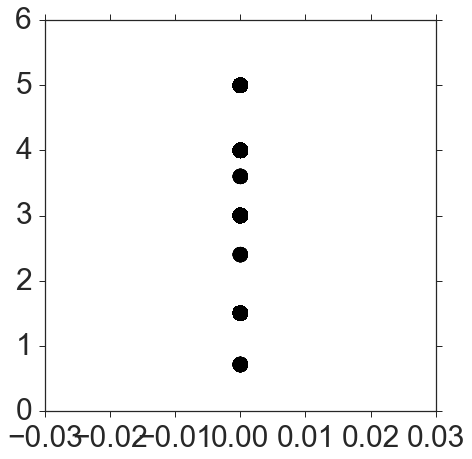

In [12]:
fig, axScatter = plt.subplots(figsize=(7, 7))
#axScatter.scatter(x, y, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
axScatter.scatter(x, y, s=ycount*0.1, c='k', alpha=0.5, linewidths=0.1, marker='o', label='Ground Truth')
# commenting out diff algs; can do diff plots
axScatter.scatter(burn_knn, enr_knn, s=ycount*0.1, c=colors['MBrwn'], alpha=0.5, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, s=ycount*0.1, c=colors['MPurp'], alpha=0.5, linewidths=0.1, marker='s', label='Ridge Pred')
#axScatter.scatter(burn_svr, enr_svr, s=ycount*0.1, c=colors['MTeal'], alpha=0.5, linewidths=0.1, marker='s', label='SVR Pred')
#axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
fig.savefig('test.png', bbox_inches='tight')
plt.show()

NameError: name 'burn_svr' is not defined

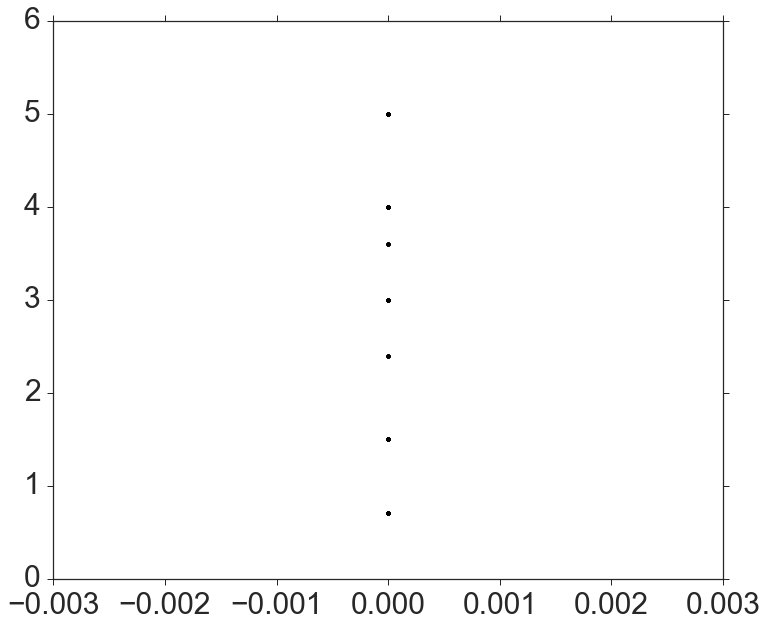

In [32]:
plt.clf()
fig, axScatter = plt.subplots(figsize=(12,10))
#fig.suptitle('test title', fontsize=20)
axScatter.scatter(x, y, c='k', s=10, linewidths=0.1, marker='o', label='Ground Truth')
#axScatter.scatter(burn_knn, enr_knn, c=colors['MBrwn'], s=10, linewidths=0.1, marker='s', label='kNN Pred')
#axScatter.scatter(burn_rr, enr_rr, c=colors['MPurp'], s=10, linewidths=0.1, marker='s', label='Ridge Pred')
axScatter.scatter(burn_svr, enr_svr, c=colors['MTeal'], s=10, linewidths=0.1, marker='s', label='SVR Pred')
axScatter.legend()
plt.xlabel('Burnup [GWd/MTU]', fontsize=16)
plt.ylabel('Enrichment [%U235]', fontsize=16)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1, pad=0.2, sharex=axScatter)
axHisty = divider.append_axes("right", 1.75, pad=0.2, sharey=axScatter)
axHistx.hist(x, bins=xbins, color='0.5')
axHisty.hist(y, bins=ybins, orientation='horizontal', color='0.5')
plt.setp(axHistx.get_xticklabels(), visible=False)
plt.setp(axHisty.get_yticklabels(), visible=False)
axHistx.set_yticks([0, 250, 500])
axHisty.set_xticks([0, 1000, 2000])
# comment out to see the really bad predictions
#plt.ylim(ymax=6)
plt.show()

In [ ]:
burn = pd.read_csv('results/28march2018/sfcompo_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
cool = pd.read_csv('results/28march2018/sfcompo_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
enri = pd.read_csv('results/28march2018/sfcompo_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
rxtr = pd.read_csv('results/28march2018/sfcompo_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
burn = burn.loc[:, ['SVR', 'TrueY', 'kNN', 'Ridge']]//1000
cool = cool.loc[:, ['SVR', 'TrueY', 'kNN', 'Ridge']]//30
burn['Parameter'] = 'Burnup [GWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Months]'
rxtr['Parameter'] = 'Reactor Type'